# Homework 4
## Antonio Rippe

Import the needed modules for analysis and set jupyter to generate plots inline. 

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

This program will use numpy and pandas to read a dataset and calculate a regression through the data using least squares to calculate the coefficients.

$B=(X^TX)^{-1}X^Ty$

Read in the iris dataset and look at the first entries to make sure data was read in correctly.

In [159]:
iris_df = pd.read_csv('iris.txt')
iris_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Create a reduced dataset with only the `PetalLength` and `PetalWidth` columns.

In [160]:
iris_df_reduced = iris_df.loc[:,['PetalLength','PetalWidth']]

# Create two arrays to store the X and Y values.
x_var = iris_df_reduced.as_matrix(columns=['PetalLength'])
y_var = iris_df_reduced.as_matrix(columns=['PetalWidth'])

The below functions are used to calculate the least squared coefficients and the slope and intercept.

In [161]:
def lscoeff(x,y):
    """
    Returns the least-squared coefficients of the regression through the provided x and y data.
    """
    return np.linalg.inv((x.T).dot(x)).dot(x.T).dot(y)

In [162]:
def lineform(X, Y):
    """
    Returns the slope and intercept of a regression line based on the least-squares result from lscoeff().
    """
    # Creates matrix of observations from X variables such that the first column is the vector 1
    x_ones = np.array([np.ones(len(X)), x_var[:,0]]).T
   
    b = lscoeff(x_ones, Y)
    
    x_line = np.linspace(X.min(), X.max(), 2)
    
    return x_line, np.array(b[0] + b[1] * x_line)

xx, yy = lineform(x_var, y_var)

Plot the scatter and regression.

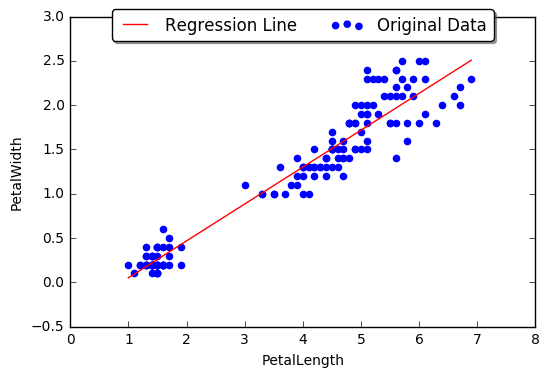

In [163]:
#iris_df_reduced.plot(kind='scatter', x='PetalLength', y='PetalWidth', label='Original Data')

plt.scatter(x_var, y_var, color='b', label='Original Data')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')

plt.plot(xx, yy.T, color='r', label='Regression Line')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)


plt.show()

# Validation using np.polyfit

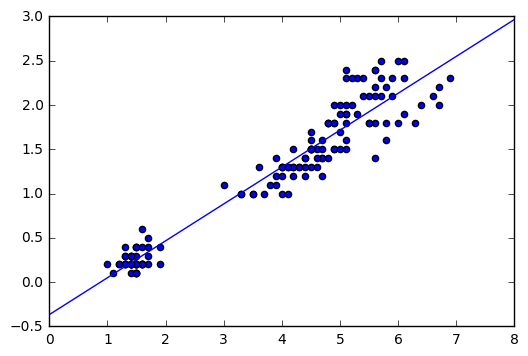

In [164]:
# Scatter plot
plt.scatter(x_var, y_var)

# Add correlation line
axes = plt.gca()
m, b = np.polyfit(x_var.flatten(), y_var.flatten(), 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')

plt.axis([0, 8, -0.5, 3])

plt.show()